In [3]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
pd.options.display.width = 1200
pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 100
pd.options.display.max_rows = 67

In [5]:
data = pd.read_csv("CW_ModelDevelopment.csv", index_col=[0,1])
data.head()

,,PP1,PP2,PP3,KF1,KF2,KF3,KF4,KF5,KF6,KF7,KF8,KF9,KF10,Z1,Z2,Z3,Z4,Z5,F1,F2,F3,F4,F5,F6,T1,T2,T3,T4,T5,VHSE1,VHSE2,VHSE3,VHSE4,VHSE5,VHSE6,VHSE7,VHSE8,ProtFP1,ProtFP2,ProtFP3,ProtFP4,ProtFP5,ProtFP6,ProtFP7,ProtFP8,ST1,ST2,ST3,ST4,ST5,ST6,ST7,ST8,BLOSUM1,BLOSUM2,BLOSUM3,BLOSUM4,BLOSUM5,BLOSUM6,BLOSUM7,BLOSUM8,BLOSUM9,BLOSUM10,MSWHIM1,MSWHIM2,MSWHIM3,Class
ID,Epitope,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LDRLFNKKKELGQDK,E-10004,0.220667,-0.172667,0.055333,-0.175333,0.232667,-0.378667,0.565333,0.084000,-0.762000,0.542667,0.154000,0.130000,0.224000,0.902667,0.285333,-0.877333,-0.329333,0.407333,NaN,0.271067,0.096267,0.462000,-0.059733,0.049667,-3.556000,1.176000,-0.360667,0.206000,0.384000,-0.412000,0.360000,0.169333,0.358667,0.034000,0.190667,0.682667,-0.141333,-2.104000,1.502667,-0.427333,0.163333,-0.546667,0.634667,0.050000,0.165333,-0.693933,0.016867,-0.040067,-0.090733,-0.075400,0.401733,0.146333,0.395867,0.516667,-0.040000,-0.415333,-0.193333,0.127333,0.252667,-0.113333,0.211333,-0.048667,-0.317333,-0.208667,0.142000,-0.072667,Negative
LKLDRLFNKKKELGQ,E-10004,0.094000,-0.111333,0.106000,-0.283333,0.247333,-0.289333,0.438000,0.108667,NaN,0.708000,0.072000,NaN,NaN,0.352000,0.136667,-1.105333,-0.213333,0.413333,NaN,0.375867,0.182067,0.600600,-0.006733,0.157733,-3.538000,1.144667,-0.486000,0.329333,0.315333,-0.244667,0.320000,0.220667,0.306000,0.227333,0.012000,0.686000,-0.220000,-1.279333,1.351333,-0.338667,0.510667,-0.692000,0.769333,0.040000,0.068667,-0.688533,-0.004800,0.014533,-0.078133,-0.191733,0.463333,0.147400,0.392267,0.319333,-0.098000,-0.495333,-0.237333,0.195333,0.274667,0.002000,0.186000,-0.068000,-0.300000,-0.265333,0.256667,-0.019333,Negative
NKYKLKLDRLFNKKK,E-10004,0.253333,0.012667,0.302000,-0.060667,0.552667,-0.140667,0.614000,0.370000,-1.067333,0.624000,0.127333,0.221333,0.310000,0.516000,0.832667,-1.160667,0.306000,0.406000,NaN,0.287133,0.398933,0.393867,-0.107867,0.436600,-2.651333,1.295333,-0.641333,0.176000,0.057333,-0.360667,0.582667,0.500000,0.374000,0.603333,0.328000,0.701333,-0.134000,-1.461333,2.642667,0.057333,0.980667,-0.561333,0.526667,0.283333,0.161333,-0.530333,0.099267,0.132000,-0.134867,-0.171800,0.672400,0.115867,0.254533,0.362000,0.038000,-0.598000,-0.156000,0.324667,0.220000,0.052667,0.043333,-0.124667,-0.518667,-0.225333,0.254667,0.089333,Negative
RLFNKKKELGQDKMQ,E-10004,0.211333,-0.133333,0.107333,-0.269333,0.275333,-0.280667,0.609333,0.388667,NaN,0.653333,0.133333,NaN,NaN,0.849333,0.328667,-0.971333,-0.077333,0.280000,NaN,0.340600,0.103867,0.255533,-0.080400,0.185867,-3.426000,1.287333,-0.558000,0.219333,0.282000,-0.422667,0.283333,0.213333,0.423333,0.219333,0.229333,0.604667,-0.210000,-1.970000,1.733333,-0.234000,0.471333,-0.396667,0.691333,-0.155333,0.212667,-0.668733,0.094133,0.040467,-0.046800,-0.095933,0.429200,0.205933,0.384800,0.516000,-0.002667,-0.500667,-0.298000,0.240667,0.248667,-0.038000,0.193333,-0.021333,-0.228667,-0.193333,0.294000,-0.039333,Negative
YKLKLDRLFNKKKEL,E-10004,0.161333,0.010000,0.152000,-0.280000,0.515333,-0.240667,0.451333,0.131333,-1.094000,0.620000,0.025333,0.186667,0.439333,0.082000,0.596000,-1.170667,0.032667,0.317333,NaN,0.479333,0.431267,0.539267,0.003333,0.303533,-2.664667,1.235333,-0.604667,0.221333,0.039333,-0.204667,0.567333,0.508667,0.245333,0.401333,0.124000,0.610000,-0.129333,-0.759333,2.313333,-0.352000,0.681333,-0.817333,0.613333,0.169333,0.111333,-0.534533,0.035467,0.132800,-0.144600,-0.206467,0.696667,0.086600,0.244600,0.190000,-0.016000,-0.644667,-0.202000,0.245333,0.175333,-0.019333,0.106667,-0.034667,-0.434000,-0.234000,0.258000,0.080000,Negative


In [4]:
data.shape

(15000, 67)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import time

<h2>Pre-processing</h2>
<h4>Remove or predict missing data</h4>

In [7]:
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("CW_ModelDevelopment.csv", index_col=[0,1])

cols = ["ProtFP2", "MSWHIM3", "ST6", "BLOSUM3", "PP1", "T2"]

new = data[cols]

test = new[new["T2"].isnull()]
train = new.dropna()

X = train.drop("T2", axis=1)
y = train["T2"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

missing = test.drop("T2", axis=1)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

r2_score(y_test, y_pred)

0.9014321969100638

In [8]:
#replace the missing values with predicted values
y_pred = lr.predict(missing)
data.loc[data.T2.isnull(), 'T2'] = y_pred
data = data.drop(columns=["F1","KF6","KF9","KF10"])
data = data.dropna()
data

C:\Users\olive\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2877: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


,,PP1,PP2,PP3,KF1,KF2,KF3,KF4,KF5,KF7,KF8,Z1,Z2,Z3,Z4,Z5,F2,F3,F4,F5,F6,T1,T2,T3,T4,T5,VHSE1,VHSE2,VHSE3,VHSE4,VHSE5,VHSE6,VHSE7,VHSE8,ProtFP1,ProtFP2,ProtFP3,ProtFP4,ProtFP5,ProtFP6,ProtFP7,ProtFP8,ST1,ST2,ST3,ST4,ST5,ST6,ST7,ST8,BLOSUM1,BLOSUM2,BLOSUM3,BLOSUM4,BLOSUM5,BLOSUM6,BLOSUM7,BLOSUM8,BLOSUM9,BLOSUM10,MSWHIM1,MSWHIM2,MSWHIM3,Class
ID,Epitope,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LDRLFNKKKELGQDK,E-10004,0.220667,-0.172667,0.055333,-0.175333,0.232667,-0.378667,0.565333,0.084000,0.542667,0.154000,0.902667,0.285333,-0.877333,-0.329333,0.407333,0.271067,0.096267,0.462000,-0.059733,0.049667,-3.556000,1.176000,-0.360667,0.206000,0.384000,-0.412000,0.360000,0.169333,0.358667,0.034000,0.190667,0.682667,-0.141333,-2.104000,1.502667,-0.427333,0.163333,-0.546667,0.634667,0.050000,0.165333,-0.693933,0.016867,-0.040067,-0.090733,-0.075400,0.401733,0.146333,0.395867,0.516667,-0.040000,-0.415333,-0.193333,0.127333,0.252667,-0.113333,0.211333,-0.048667,-0.317333,-0.208667,0.142000,-0.072667,Negative
LKLDRLFNKKKELGQ,E-10004,0.094000,-0.111333,0.106000,-0.283333,0.247333,-0.289333,0.438000,0.108667,0.708000,0.072000,0.352000,0.136667,-1.105333,-0.213333,0.413333,0.375867,0.182067,0.600600,-0.006733,0.157733,-3.538000,1.144667,-0.486000,0.329333,0.315333,-0.244667,0.320000,0.220667,0.306000,0.227333,0.012000,0.686000,-0.220000,-1.279333,1.351333,-0.338667,0.510667,-0.692000,0.769333,0.040000,0.068667,-0.688533,-0.004800,0.014533,-0.078133,-0.191733,0.463333,0.147400,0.392267,0.319333,-0.098000,-0.495333,-0.237333,0.195333,0.274667,0.002000,0.186000,-0.068000,-0.300000,-0.265333,0.256667,-0.019333,Negative
NKYKLKLDRLFNKKK,E-10004,0.253333,0.012667,0.302000,-0.060667,0.552667,-0.140667,0.614000,0.370000,0.624000,0.127333,0.516000,0.832667,-1.160667,0.306000,0.406000,0.287133,0.398933,0.393867,-0.107867,0.436600,-2.651333,1.295333,-0.641333,0.176000,0.057333,-0.360667,0.582667,0.500000,0.374000,0.603333,0.328000,0.701333,-0.134000,-1.461333,2.642667,0.057333,0.980667,-0.561333,0.526667,0.283333,0.161333,-0.530333,0.099267,0.132000,-0.134867,-0.171800,0.672400,0.115867,0.254533,0.362000,0.038000,-0.598000,-0.156000,0.324667,0.220000,0.052667,0.043333,-0.124667,-0.518667,-0.225333,0.254667,0.089333,Negative
RLFNKKKELGQDKMQ,E-10004,0.211333,-0.133333,0.107333,-0.269333,0.275333,-0.280667,0.609333,0.388667,0.653333,0.133333,0.849333,0.328667,-0.971333,-0.077333,0.280000,0.340600,0.103867,0.255533,-0.080400,0.185867,-3.426000,1.287333,-0.558000,0.219333,0.282000,-0.422667,0.283333,0.213333,0.423333,0.219333,0.229333,0.604667,-0.210000,-1.970000,1.733333,-0.234000,0.471333,-0.396667,0.691333,-0.155333,0.212667,-0.668733,0.094133,0.040467,-0.046800,-0.095933,0.429200,0.205933,0.384800,0.516000,-0.002667,-0.500667,-0.298000,0.240667,0.248667,-0.038000,0.193333,-0.021333,-0.228667,-0.193333,0.294000,-0.039333,Negative
YKLKLDRLFNKKKEL,E-10004,0.161333,0.010000,0.152000,-0.280000,0.515333,-0.240667,0.451333,0.131333,0.620000,0.025333,0.082000,0.596000,-1.170667,0.032667,0.317333,0.479333,0.431267,0.539267,0.003333,0.303533,-2.664667,1.235333,-0.604667,0.221333,0.039333,-0.204667,0.567333,0.508667,0.245333,0.401333,0.124000,0.610000,-0.129333,-0.759333,2.313333,-0.352000,0.681333,-0.817333,0.613333,0.169333,0.111333,-0.534533,0.035467,0.132800,-0.144600,-0.206467,0.696667,0.086600,0.244600,0.190000,-0.016000,-0.644667,-0.202000,0.245333,0.175333,-0.019333,0.106667,-0.034667,-0.434000,-0.234000,0.258000,0.080000,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DGNNEDNEKLRKPKH,E-43575,0.468000,-0.341333,0.041333,0.196667,0.112667,-0.530667,0.775333,0.069333,0.124667,0.302000,2.153333,0.618000,-0.216000,-0.328667,0.609333,-0.100200,-0.222933,0.076933,0.094867,-0.264800,-3.858000,0.816667,-0.005333,-0.116667,0.52200

<h4>Scale Dataframe</h4>

In [8]:
cols = data.columns
cols = list(cols.drop("Class"))

In [9]:
import joblib

In [10]:
scaler = MinMaxScaler()
scaler.fit(data[cols])
data[cols] = scaler.transform(data[cols])
data.loc["LDRLFNKKKELGQDK"]

,PP1,PP2,PP3,KF1,KF2,KF3,KF4,KF5,KF7,KF8,Z1,Z2,Z3,Z4,Z5,F2,F3,F4,F5,F6,T1,T2,T3,T4,T5,VHSE1,VHSE2,VHSE3,VHSE4,VHSE5,VHSE6,VHSE7,VHSE8,ProtFP1,ProtFP2,ProtFP3,ProtFP4,ProtFP5,ProtFP6,ProtFP7,ProtFP8,ST1,ST2,ST3,ST4,ST5,ST6,ST7,ST8,BLOSUM1,BLOSUM2,BLOSUM3,BLOSUM4,BLOSUM5,BLOSUM6,BLOSUM7,BLOSUM8,BLOSUM9,BLOSUM10,MSWHIM1,MSWHIM2,MSWHIM3,Class
Epitope,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
E-10004,0.6574,0.613005,0.556224,0.411765,0.783844,0.319924,0.742857,0.578408,0.832003,0.607354,0.649126,0.678144,0.244074,0.537398,0.542829,0.717201,0.597468,0.641526,0.217876,0.560113,0.673866,0.858511,0.280247,0.524941,0.257035,0.321667,0.747876,0.765465,0.649659,0.68666,0.670588,0.761518,0.238011,0.339658,0.827053,0.416164,0.607037,0.384237,0.762382,0.538047,0.631182,0.656812,0.734884,0.621555,0.400266,0.395117,0.849941,0.457679,0.502167,0.649828,0.542929,0.224756,0.319087,0.52821,0.728187,0.423611,0.81889,0.364122,0.242321,0.562044,0.48431,0.798813,Negative
E-31523,0.6574,0.613005,0.556224,0.411765,0.783844,0.319924,0.742857,0.578408,0.832003,0.607354,0.649126,0.678144,0.244074,0.537398,0.542829,0.717201,0.597468,0.641526,0.217876,0.560113,0.673866,0.858511,0.280247,0.524941,0.257035,0.321667,0.747876,0.765465,0.649659,0.68666,0.670588,0.761518,0.238011,0.339658,0.827053,0.416164,0.607037,0.384237,0.762382,0.538047,0.631182,0.656812,0.734884,0.621555,0.400266,0.395117,0.849941,0.457679,0.502167,0.649828,0.542929,0.224756,0.319087,0.52821,0.728187,0.423611,0.81889,0.364122,0.242321,0.562044,0.48431,0.798813,Negative
E-31793,0.6574,0.613005,0.556224,0.411765,0.783844,0.319924,0.742857,0.578408,0.832003,0.607354,0.649126,0.678144,0.244074,0.537398,0.542829,0.717201,0.597468,0.641526,0.217876,0.560113,0.673866,0.858511,0.280247,0.524941,0.257035,0.321667,0.747876,0.765465,0.649659,0.68666,0.670588,0.761518,0.238011,0.339658,0.827053,0.416164,0.607037,0.384237,0.762382,0.538047,0.631182,0.656812,0.734884,0.621555,0.400266,0.395117,0.849941,0.457679,0.502167,0.649828,0.542929,0.224756,0.319087,0.52821,0.728187,0.423611,0.81889,0.364122,0.242321,0.562044,0.48431,0.798813,Negative
E-35921,0.6574,0.613005,0.556224,0.411765,0.783844,0.319924,0.742857,0.578408,0.832003,0.607354,0.649126,0.678144,0.244074,0.537398,0.542829,0.717201,0.597468,0.641526,0.217876,0.560113,0.673866,0.858511,0.280247,0.524941,0.257035,0.321667,0.747876,0.765465,0.649659,0.68666,0.670588,0.761518,0.238011,0.339658,0.827053,0.416164,0.607037,0.384237,0.762382,0.538047,0.631182,0.656812,0.734884,0.621555,0.400266,0.395117,0.849941,0.457679,0.502167,0.649828,0.542929,0.224756,0.319087,0.52821,0.728187,0.423611,0.81889,0.364122,0.242321,0.562044,0.48431,0.798813,Negative


<h4>Create testing and training data</h4>

<p>Test and training data</p>

In [53]:
X_train = data.drop(columns='Class')
y_train = data["Class"]

<p>Create k folds</p>

In [12]:
state = 42
folds = 8
kf = KFold(folds, True, state).split(X_train)
split = []
for x in range(folds):
    split.append(next(kf, None))

C:\Users\olive\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=42 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


<p>K folds on training data</p>

In [13]:
def split_data(X,y):

    global X_tn
    global X_tt
    global y_tn
    global y_tt

    X_tn = []
    X_tt = []
    y_tn = []
    y_tt = []
    
    for x in range(folds):
        X_tn.append(X.iloc[split[x][0]])
        X_tt.append(X.iloc[split[x][1]])
        y_tn.append(y.iloc[split[x][0]])
        y_tt.append(y.iloc[split[x][1]])

<h4>Classifiers</h4>

In [14]:
classifiers ={
    "Naive Bayes" : GaussianNB(),
    "Decision Tree" : DecisionTreeClassifier(random_state=state),
    "MLP Classifier" : MLPClassifier(max_iter=1000, random_state=state),
    "Logistic Regression" : LogisticRegression(max_iter=1000, random_state=state),
    "K Neighbors Classifier" : KNeighborsClassifier(),
}

<h4>Train model and retrieve results</h4>

In [15]:
def model_results(model, s = None, d= True, i = 0):
    if d==True:
        print("Training",model)
    t_start = time.time()
    best = 0
    y_pred_best = []
    
    if s == None:
        for x in range(folds):

            MLPC_model = classifiers[model]
            MLPC_model.fit(X_tn[x], y_tn[x])
            y_pred = MLPC_model.predict(X_tt[x])
            
            f1_scr = f1_score(y_tt[x], y_pred, pos_label="Positive")

            if best<f1_scr:
                fold = x
                best = f1_scr
                y_pred_best = y_pred

        best_fold.append(fold)
        print(y_tt[fold])
        print(y_pred_best)
        f1[i].append(f1_score(y_tt[fold],y_pred_best, pos_label="Positive"))
        acc[i].append(accuracy_score(y_tt[fold],y_pred_best))
        
    else:
        MLPC_model = classifiers[model]
        MLPC_model.fit(X_tn[s], y_tn[s])

        y_pred_best = MLPC_model.predict(X_tt[s])
        fold = s
        f1[i].append(f1_score(y_tt[fold],y_pred_best, pos_label="Positive"))
        acc[i].append(accuracy_score(y_tt[fold],y_pred_best))
    
    if d ==True:
        print("Time Taken:", np.round(time.time() - t_start, 2))
        print("Best fold:",fold+1)
        print(classification_report(y_tt[fold], y_pred_best))
        tn, fp, fn, tp = confusion_matrix(y_tt[fold], y_pred_best).ravel()
        print("True Negatives:",tn)
        print("False Negatives",fn)
        print("True Positives",tp) 
        print("False Positive",fp)
        print("-------------------------------------------")

<h4>Benchmark models</h4>

In [16]:
split_data(X_train, y_train)
f1 = [[]]
acc =[[]]
best_fold = []

for y in enumerate(classifiers):
    model_results(y[1])

Training Naive Bayes
ID               Epitope
LKSYENFLPEAKVTT  E-2675     Negative
PLAGVYRSLKKQIEK  E-34796    Negative
AKLNDVCANDYCQIP  E-32041    Negative
QIGSHFHFFEVNRCL  E-16104    Negative
KNIFTFNLNLNDILN  E-17195    Negative
                              ...   
YLFYYYLKDIKSMLS  E-36041    Negative
QTAQAAPVQEGVQQE  E-12128    Negative
NDIEKKICKMEKCSS  E-31184    Negative
INDFILILNDKKFME  E-36608    Negative
DIIHHAAGLGGIGAI  E-26513    Negative
Name: Class, Length: 1492, dtype: object
['Negative' 'Negative' 'Negative' ... 'Negative' 'Negative' 'Positive']
Time Taken: 0.25
Best fold: 4
              precision    recall  f1-score   support

    Negative       0.91      0.84      0.88      1283
    Positive       0.34      0.49      0.40       209

    accuracy                           0.79      1492
   macro avg       0.62      0.67      0.64      1492
weighted avg       0.83      0.79      0.81      1492

True Negatives: 1083
False Negatives 107
True Positives 102
False Positive 20

<h2>Feature Selection via:</h2>

<h4>Variance</h4>

In [19]:
X_train.var().sort_values()

F5          0.008889
Z5          0.009400
VHSE8       0.010012
BLOSUM6     0.011907
BLOSUM5     0.012038
F4          0.012626
Z3          0.012699
MSWHIM2     0.012900
KF8         0.013066
Z1          0.013212
ST4         0.013581
Z4          0.013766
ProtFP5     0.013811
ProtFP6     0.013888
BLOSUM1     0.013982
ProtFP1     0.014034
ST7         0.014212
VHSE1       0.014795
ST5         0.015080
ProtFP4     0.015188
VHSE4       0.015615
VHSE5       0.016037
ProtFP8     0.016600
ProtFP3     0.016801
VHSE7       0.016864
BLOSUM2     0.016947
PP1         0.016975
F3          0.017308
VHSE6       0.017749
T2          0.017770
Z2          0.017788
PP2         0.017838
KF1         0.017963
F6          0.018365
KF4         0.018436
T1          0.018757
MSWHIM1     0.018990
BLOSUM7     0.019114
T4          0.019148
ST1         0.019235
ProtFP7     0.019245
BLOSUM8     0.019249
BLOSUM9     0.019448
ST8         0.019746
VHSE2       0.019760
PP3         0.019805
KF5         0.019925
ST2         0

In [20]:
split_data(X_train, y_train)
from sklearn.feature_selection import VarianceThreshold

select = VarianceThreshold(threshold=(0.02))
select.fit_transform(data.drop(columns='Class'))

cols = []
for x in enumerate(select.get_support(indices=True)):
    cols.append(data.columns[x[1]])

print("Features:",len(cols))

f1 = [[]]
acc = [[]]

X_train_1 = X_train[cols].copy()

split_data(X_train_1, y_train)

index = 0
for i in enumerate(classifiers):
    model_results(i[1], s = best_fold[index], d=False)
    index = index+1

print("f1 score:",f1[0])
print("acc:",acc[0])

Features: 14
f1 score: [0.20612813370473537, 0.5189189189189188, 0.38235294117647056, 0.11282051282051284, 0.5698324022346368]
acc: [0.8089812332439679, 0.8806970509383378, 0.8873994638069705, 0.8840482573726541, 0.8967828418230563]


<h4>Univariate Feature Selection</h4>

In [21]:
#https://www.youtube.com/watch?v=wjKvyk8xStg
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2

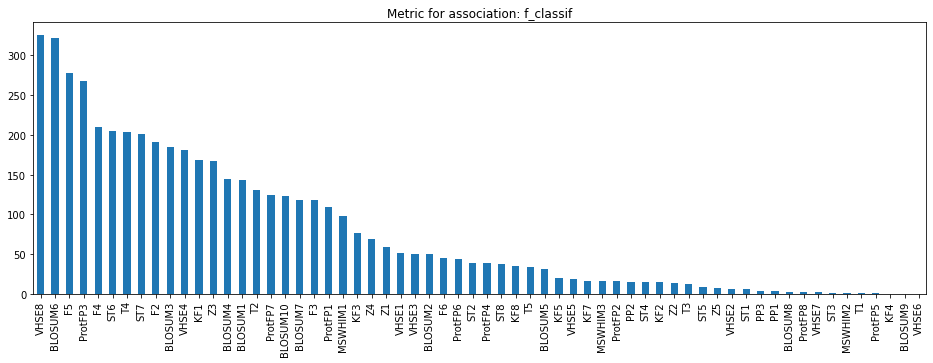

In [22]:
cl = f_classif(X_train, y_train)
cl = pd.Series(cl[0])
cl.index = X_train.columns
cl.sort_values(ascending=False, inplace = True)

plt.title('Metric for association: f_classif')
cl.plot.bar(figsize = (16,5))
plt.show()

<h4>Remove coorelations</h4>

In [23]:
#Drop one of high correlated pair
#Multicollinearity
pos_data = X_train.corr().abs()
unstack_data = pos_data.unstack()
corr_data = pd.DataFrame(unstack_data)

corrs = []
for x in range(62**2):
    corrs.append([corr_data.index[x],corr_data.values[x][0]])
    
corrs = sorted(corrs, key=lambda x: -x[1])
corrs = corrs[62:-1: 2]

drop_features = []
for x in range(len(corrs)):
    if corrs[x][1] >= 0.8:
        a = corrs[x][0][0]
        b = corrs[x][0][1]
        if a not in drop_features or b not in drop_features:
            if cl[a] >= cl[b]:
                c = 1
            else:
                c = 0
            drop_features.append(corrs[x][0][c])
        
drop_features = list(dict.fromkeys(drop_features))
X_train_2 = X_train.drop(columns=drop_features)
print("Features:",X_train_2.shape[1])

split_data(X_train_2, y_train)

f1 = [[]]
index = 0
for i in enumerate(classifiers):
    model_results(i[1], s = best_fold[index], d=False)
    index = index+1

print("f1 score:",f1[0])    

Features: 39
f1 score: [0.39913232104121477, 0.5531914893617021, 0.46735395189003437, 0.17647058823529413, 0.6186666666666667]


<h4>f_classif W/O correlation</h4>

In [24]:
t = f_classif
num = 16

split_data(X_train, y_train)
select = SelectKBest(t, k=num)
select.fit_transform(X_train, y_train)

cols = []
for x in enumerate(select.get_support(indices=True)):
    cols.append(X_train.columns[x[1]])

ordered = [x for _,x in sorted(zip(select.scores_,cols))]
ordered.reverse()

f1 = []
acc =[]
for x in range(1,num):
    f1.append([])
    acc.append([])
    use = ordered[0:x]
    X_train_new = X_train[use].copy()
    index = 0
    
    split_data(X_train_new, y_train)
    for i in enumerate(classifiers):
        model_results(i[1], s = best_fold[index], d=False, i=(x-1))
        index = index+1

for x in range(len(acc)):
    print(x+1,".............")
    for y in range(len(acc[x])):
        print(acc[x][y])
for x in range(len(f1)):
    print(x+1,".............")
    for y in range(len(f1[x])):
        print(f1[x][y])

1 .............
0.8525469168900804
0.8659517426273459
0.8652815013404825
0.8840482573726541
0.8532171581769437
2 .............
0.8545576407506702
0.8693029490616622
0.8652815013404825
0.8840482573726541
0.8592493297587132
3 .............
0.8558981233243967
0.863941018766756
0.868632707774799
0.8833780160857909
0.8605898123324397
4 .............
0.8532171581769437
0.878686327077748
0.8693029490616622
0.8847184986595175
0.868632707774799
5 .............
0.8525469168900804
0.886058981233244
0.8679624664879356
0.8853887399463807
0.8646112600536193
6 .............
0.8445040214477212
0.8806970509383378
0.8652815013404825
0.8840482573726541
0.878686327077748
7 .............
0.8424932975871313
0.886058981233244
0.8739946380697051
0.8847184986595175
0.8820375335120644
8 .............
0.8431635388739946
0.8739946380697051
0.8753351206434317
0.8853887399463807
0.8800268096514745
9 .............
0.839142091152815
0.8699731903485255
0.8800268096514745
0.8833780160857909
0.8853887399463807
10 ......

<h4>f_classif W correlation</h4>

In [25]:
t = f_classif
num = 16

split_data(X_train_2, y_train)
select = SelectKBest(t, k=num)
select.fit_transform(X_train_2, y_train)

cols = []
for x in enumerate(select.get_support(indices=True)):
    cols.append(X_train_2.columns[x[1]])

ordered = [x for _,x in sorted(zip(select.scores_,cols))]
ordered.reverse()

f1 = []
acc =[]
for x in range(1,num):
    f1.append([])
    acc.append([])
    use = ordered[0:x]
    X_train_new = X_train_2[use].copy()
    index = 0
    
    if x ==15:
        selected_model_1 = X_train_new.copy()
    
    split_data(X_train_new, y_train)
    for i in enumerate(classifiers):
        model_results(i[1], s = best_fold[index], d=False, i=(x-1))
        index = index+1
        
for x in range(len(acc)):
    print(x+1,".............")
    for y in range(len(acc[x])):
        print(acc[x][y])
for x in range(len(f1)):
    print(x+1,".............")
    for y in range(len(f1[x])):
        print(f1[x][y])
        

1 .............
0.8599195710455764
0.8699731903485255
0.8652815013404825
0.8833780160857909
0.8532171581769437
2 .............
0.8599195710455764
0.8652815013404825
0.8652815013404825
0.8833780160857909
0.8565683646112601
3 .............
0.8679624664879356
0.8746648793565683
0.8719839142091153
0.8820375335120644
0.8666219839142091
4 .............
0.8605898123324397
0.8833780160857909
0.8719839142091153
0.881367292225201
0.868632707774799
5 .............
0.8652815013404825
0.8880697050938338
0.8753351206434317
0.8847184986595175
0.8766756032171582
6 .............
0.863941018766756
0.8894101876675603
0.8726541554959786
0.8847184986595175
0.8766756032171582
7 .............
0.8699731903485255
0.881367292225201
0.8773458445040214
0.8833780160857909
0.8827077747989276
8 .............
0.8558981233243967
0.8847184986595175
0.8820375335120644
0.8853887399463807
0.8981233243967829
9 .............
0.8478552278820375
0.8760053619302949
0.8800268096514745
0.8853887399463807
0.8900804289544236
10 ..

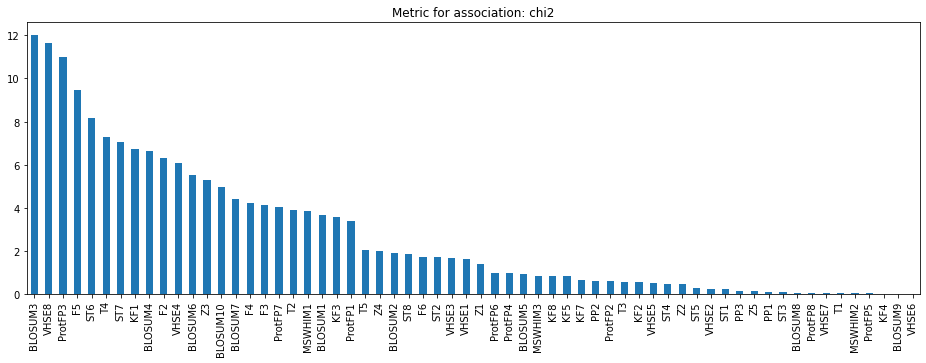

In [26]:
cl = chi2(X_train, y_train)
cl = pd.Series(cl[0])
cl.index = X_train.columns
cl.sort_values(ascending=False, inplace = True)

plt.title('Metric for association: chi2')
cl.plot.bar(figsize = (16,5))
plt.show()

In [27]:
#Drop one of high correlated pair
#Multicollinearity
pos_data = X_train.corr().abs()
unstack_data = pos_data.unstack()
corr_data = pd.DataFrame(unstack_data)

corrs = []
for x in range(62**2):
    corrs.append([corr_data.index[x],corr_data.values[x][0]])
    
corrs = sorted(corrs, key=lambda x: -x[1])
corrs = corrs[62:-1: 2]

drop_features = []
for x in range(len(corrs)):
    if corrs[x][1] >= 0.8:
        a = corrs[x][0][0]
        b = corrs[x][0][1]
        if a not in drop_features or b not in drop_features:
            if cl[a] >= cl[b]:
                c = 1
            else:
                c = 0
            drop_features.append(corrs[x][0][c])
        
drop_features = list(dict.fromkeys(drop_features))
X_train_2 = X_train.drop(columns=drop_features)
print("Features:",X_train_2.shape[1])

split_data(X_train_2, y_train)

f1 = [[]]
index = 0
for i in enumerate(classifiers):
    model_results(i[1], s = best_fold[index], d=False)
    index = index+1

print("f1 score:",f1[0]) 

Features: 39
f1 score: [0.40170940170940167, 0.5454545454545455, 0.4717607973421926, 0.16748768472906403, 0.6253369272237196]


In [28]:
t = chi2
num = 16

split_data(X_train, y_train)
select = SelectKBest(t, k=num)
select.fit_transform(X_train, y_train)

cols = []
for x in enumerate(select.get_support(indices=True)):
    cols.append(X_train.columns[x[1]])

ordered = [x for _,x in sorted(zip(select.scores_,cols))]
ordered.reverse()

f1 = []
acc =[]
for x in range(1,num):
    f1.append([])
    acc.append([])
    use = ordered[0:x]
    X_train_new = X_train[use].copy()
    index = 0
    
    split_data(X_train_new, y_train)
    for i in enumerate(classifiers):
        model_results(i[1], s = best_fold[index], d=False, i=(x-1))
        index = index+1

for x in range(len(acc)):
    print(x+1,".............")
    for y in range(len(acc[x])):
        print(acc[x][y])
for x in range(len(f1)):
    print(x+1,".............")
    for y in range(len(f1[x])):
        print(f1[x][y])

1 .............
0.8619302949061662
0.8766756032171582
0.8652815013404825
0.8833780160857909
0.8545576407506702
2 .............
0.8612600536193029
0.8739946380697051
0.8652815013404825
0.8847184986595175
0.8545576407506702
3 .............
0.8626005361930295
0.8706434316353887
0.863941018766756
0.8867292225201072
0.8679624664879356
4 .............
0.8626005361930295
0.881367292225201
0.8672922252010724
0.8833780160857909
0.8659517426273459
5 .............
0.8545576407506702
0.878686327077748
0.8679624664879356
0.8840482573726541
0.8739946380697051
6 .............
0.8558981233243967
0.8753351206434317
0.8706434316353887
0.8847184986595175
0.8780160857908847
7 .............
0.8585790884718498
0.8753351206434317
0.8719839142091153
0.8867292225201072
0.886058981233244
8 .............
0.8532171581769437
0.8800268096514745
0.8666219839142091
0.886058981233244
0.8827077747989276
9 .............
0.853887399463807
0.8793565683646113
0.8726541554959786
0.8847184986595175
0.8907506702412868
10 ....

In [29]:
t = chi2
num = 16

split_data(X_train_2, y_train)
select = SelectKBest(t, k=num)
select.fit_transform(X_train_2, y_train)

cols = []
for x in enumerate(select.get_support(indices=True)):
    cols.append(X_train_2.columns[x[1]])

ordered = [x for _,x in sorted(zip(select.scores_,cols))]
ordered.reverse()

f1 = []
acc =[]
for x in range(1,num):
    f1.append([])
    acc.append([])
    use = ordered[0:x]
    X_train_new = X_train_2[use].copy()
    index = 0
    
    if x ==15:
        selected_model_2 = X_train_new.copy()
        
    split_data(X_train_new, y_train)
    for i in enumerate(classifiers):
        model_results(i[1], s = best_fold[index], d=False, i=(x-1))
        index = index+1
        
for x in range(len(acc)):
    print(x+1,".............")
    for y in range(len(acc[x])):
        print(acc[x][y])
for x in range(len(f1)):
    print(x+1,".............")
    for y in range(len(f1[x])):
        print(f1[x][y])
        

1 .............
0.8599195710455764
0.8706434316353887
0.8652815013404825
0.8833780160857909
0.8418230563002681
2 .............
0.8599195710455764
0.8780160857908847
0.8659517426273459
0.8833780160857909
0.8505361930294906
3 .............
0.863941018766756
0.8746648793565683
0.8693029490616622
0.8833780160857909
0.8505361930294906
4 .............
0.8565683646112601
0.8753351206434317
0.8699731903485255
0.8833780160857909
0.8679624664879356
5 .............
0.8552278820375335
0.881367292225201
0.8753351206434317
0.8833780160857909
0.8693029490616622
6 .............
0.8498659517426274
0.8833780160857909
0.8800268096514745
0.8833780160857909
0.8726541554959786
7 .............
0.8532171581769437
0.8773458445040214
0.8800268096514745
0.8847184986595175
0.886058981233244
8 .............
0.8512064343163539
0.8760053619302949
0.8806970509383378
0.8840482573726541
0.8887399463806971
9 .............
0.846514745308311
0.8833780160857909
0.8793565683646113
0.886058981233244
0.8907506702412868
10 ...

<h4>Mutual information gain</h4>

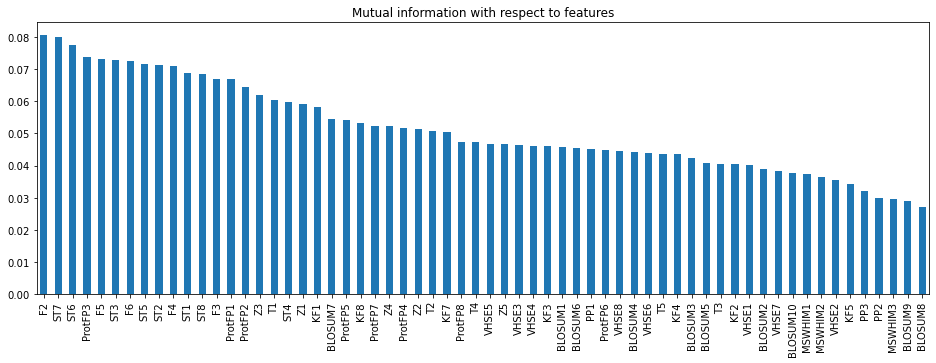

In [30]:
mi = mutual_info_classif(X_train, y_train) 
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False, inplace = True)

plt.title('Mutual information with respect to features')
mi.plot.bar(figsize = (16,5))
plt.show()

In [31]:
#Drop one of high correlated pair
#Multicollinearity
pos_data = X_train.corr().abs()
unstack_data = pos_data.unstack()
corr_data = pd.DataFrame(unstack_data)

corrs = []
for x in range(62**2):
    corrs.append([corr_data.index[x],corr_data.values[x][0]])
    
corrs = sorted(corrs, key=lambda x: -x[1])
corrs = corrs[62:-1: 2]

drop_features = []
for x in range(len(corrs)):
    if corrs[x][1] >= 0.8:
        a = corrs[x][0][0]
        b = corrs[x][0][1]
        if a not in drop_features or b not in drop_features:
            if mi[a] >= mi[b]:
                c = 1
            else:
                c = 0
            drop_features.append(corrs[x][0][c])
        
drop_features = list(dict.fromkeys(drop_features))
X_train_2 = X_train.drop(columns=drop_features)
print("Features:",X_train_2.shape[1])

split_data(X_train_2, y_train)

f1 = [[]]
index = 0
for i in enumerate(classifiers):
    model_results(i[1], s = best_fold[index], d=False)
    index = index+1

print("f1 score:",f1[0]) 

Features: 41
f1 score: [0.39737991266375544, 0.5661375661375662, 0.4172661870503597, 0.16748768472906403, 0.6455026455026455]


In [32]:
t = mutual_info_classif
num = 16

split_data(X_train, y_train)
select = SelectKBest(t, k=num)
select.fit_transform(X_train, y_train)

cols = []
for x in enumerate(select.get_support(indices=True)):
    cols.append(X_train.columns[x[1]])

ordered = [x for _,x in sorted(zip(select.scores_,cols))]
ordered.reverse()

f1 = []
acc =[]
for x in range(1,num):
    f1.append([])
    acc.append([])
    use = ordered[0:x]
    X_train_new = X_train[use].copy()
    
    if num == 15:
        selected_data = X_train_new.copy()
    index = 0
    
    split_data(X_train_new, y_train)
    for i in enumerate(classifiers):
        model_results(i[1], s = best_fold[index], d=False, i=(x-1))
        index = index+1

for x in range(len(acc)):
    print(x+1,".............")
    for y in range(len(acc[x])):
        print(acc[x][y])
for x in range(len(f1)):
    print(x+1,".............")
    for y in range(len(f1[x])):
        print(f1[x][y])

1 .............
0.8599195710455764
0.8760053619302949
0.8652815013404825
0.8833780160857909
0.853887399463807
2 .............
0.8592493297587132
0.8746648793565683
0.8646112600536193
0.8833780160857909
0.8626005361930295
3 .............
0.8592493297587132
0.8706434316353887
0.8672922252010724
0.8833780160857909
0.8626005361930295
4 .............
0.8605898123324397
0.8739946380697051
0.8666219839142091
0.8833780160857909
0.8719839142091153
5 .............
0.8599195710455764
0.8766756032171582
0.8666219839142091
0.8833780160857909
0.878686327077748
6 .............
0.8579088471849866
0.8760053619302949
0.8733243967828418
0.881367292225201
0.8941018766756033
7 .............
0.8585790884718498
0.8800268096514745
0.8719839142091153
0.881367292225201
0.8873994638069705
8 .............
0.8505361930294906
0.8793565683646113
0.8753351206434317
0.8820375335120644
0.8914209115281502
9 .............
0.8485254691689008
0.8800268096514745
0.8753351206434317
0.881367292225201
0.8934316353887399
10 ...

In [33]:
t = mutual_info_classif
num = 16

split_data(X_train_2, y_train)
select = SelectKBest(t, k=num)
select.fit_transform(X_train_2, y_train)

cols = []
for x in enumerate(select.get_support(indices=True)):
    cols.append(X_train_2.columns[x[1]])

ordered = [x for _,x in sorted(zip(select.scores_,cols))]
ordered.reverse()

f1 = []
acc =[]
for x in range(1,num):
    f1.append([])
    acc.append([])
    use = ordered[0:x]
    X_train_new = X_train_2[use].copy()
    index = 0
        
    if x ==15:
        selected_model_3 = X_train_new.copy()
    
    split_data(X_train_new, y_train)
    for i in enumerate(classifiers):
        model_results(i[1], s = best_fold[index], d=False, i=(x-1))
        index = index+1
        
for x in range(len(acc)):
    print(x+1,".............")
    for y in range(len(acc[x])):
        print(acc[x][y])
for x in range(len(f1)):
    print(x+1,".............")
    for y in range(len(f1[x])):
        print(f1[x][y])
        

1 .............
0.8599195710455764
0.8760053619302949
0.8652815013404825
0.8833780160857909
0.8558981233243967
2 .............
0.8599195710455764
0.871313672922252
0.8652815013404825
0.8833780160857909
0.8605898123324397
3 .............
0.8599195710455764
0.8793565683646113
0.8706434316353887
0.8833780160857909
0.853887399463807
4 .............
0.8599195710455764
0.8806970509383378
0.8693029490616622
0.8833780160857909
0.8659517426273459
5 .............
0.8565683646112601
0.8739946380697051
0.8693029490616622
0.8833780160857909
0.8719839142091153
6 .............
0.8585790884718498
0.8766756032171582
0.8739946380697051
0.8853887399463807
0.8853887399463807
7 .............
0.8619302949061662
0.878686327077748
0.8780160857908847
0.8853887399463807
0.8840482573726541
8 .............
0.8605898123324397
0.8766756032171582
0.8739946380697051
0.8847184986595175
0.8887399463806971
9 .............
0.8451742627345844
0.8780160857908847
0.8760053619302949
0.8840482573726541
0.8900804289544236
10 .

<h2>Selected features</h2>

In [13]:
cols = ["BLOSUM4", "KF3", "BLOSUM7", "VHSE4", "ProtFP7", "BLOSUM1", "Z3", "VHSE8", "ST7", "T4", "F4", "T2", "BLOSUM3", "BLOSUM10", "KF1","Class"]
features = data[cols].copy()
features

,,BLOSUM4,KF3,BLOSUM7,VHSE4,ProtFP7,BLOSUM1,Z3,VHSE8,ST7,T4,F4,T2,BLOSUM3,BLOSUM10,KF1,Class
ID,Epitope,,,,,,,,,,,,,,,,
LDRLFNKKKELGQDK,E-10004,0.319087,0.319924,0.423611,0.649659,0.538047,0.649828,0.244074,0.238011,0.457679,0.524941,0.641526,0.858511,0.224756,0.242321,0.411765,Negative
LKLDRLFNKKKELGQ,E-10004,0.280445,0.370778,0.503704,0.626224,0.533291,0.571542,0.184021,0.208228,0.458730,0.597038,0.707107,0.850613,0.175896,0.260068,0.365729,Negative
NKYKLKLDRLFNKKK,E-10004,0.351874,0.455408,0.538889,0.656482,0.649017,0.588469,0.169447,0.240788,0.427671,0.507404,0.609287,0.888590,0.113192,0.036177,0.460642,Negative
RLFNKKKELGQDKMQ,E-10004,0.227166,0.375712,0.475926,0.678434,0.440393,0.649564,0.219315,0.212014,0.516383,0.532736,0.543831,0.886574,0.172638,0.333106,0.371696,Negative
YKLKLDRLFNKKKEL,E-10004,0.311475,0.398482,0.488889,0.599229,0.594800,0.520233,0.166813,0.242554,0.398844,0.533905,0.678086,0.873467,0.084691,0.122867,0.367150,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DGNNEDNEKLRKPKH,E-43575,0.531616,0.233397,0.445370,0.732127,0.545656,0.869611,0.418262,0.347804,0.539234,0.336321,0.459323,0.767938,0.328583,0.393857,0.570332,Positive
EDKRDGNNEDNEKLR,E-43575,0.513466,0.227325,0.274537,0.749333,0.598605,0.903994,0.395610,0.273852,0.501937,0.351520,0.488092,0.918669,0.328990,0.370648,0.514635,Positive
EDNEKLRKPKHKKLK,E-43575,0.220141,0.275901,0.501389,0.671314,0.484147,0.779423,0.184197,0.402070,0.651192,0.444271,0.542696,0.876155,0.115635,0.240273,0.389031,Positive


In [14]:
features.to_pickle("Features")